/var/folders/9p/dm8ssc490bvf953k5btv8gh00000gn/T/ipykernel_25109/2613992291.py:62: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_vertexes = np.array(v[7:7 + case.obs_num], dtype=np.int)
/var/folders/9p/dm8ssc490bvf953k5btv8gh00000gn/T/ipykernel_25109/2613992291.py:64: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If yo

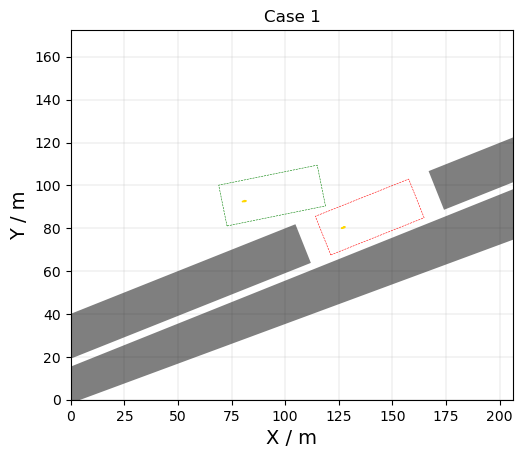

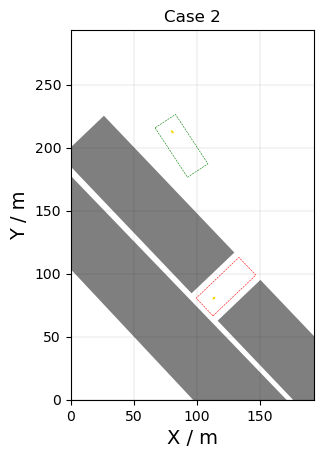

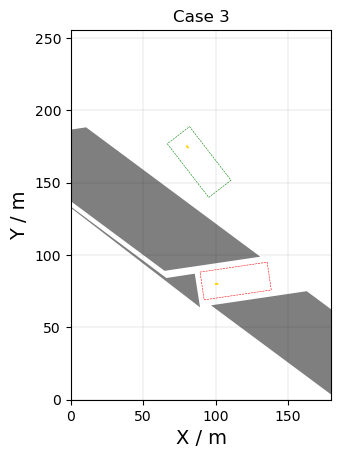

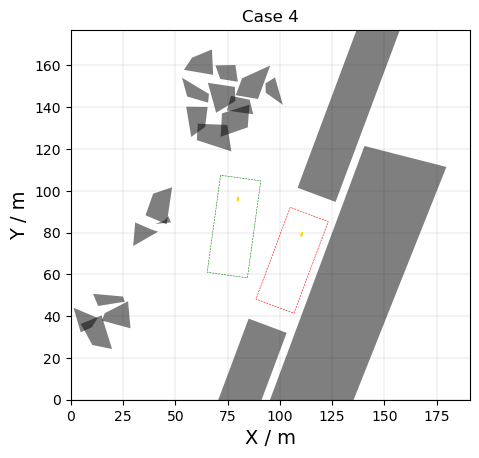

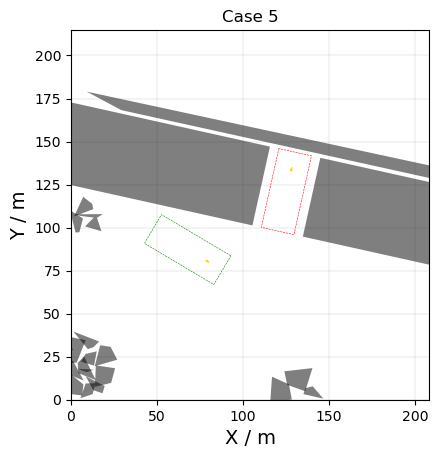

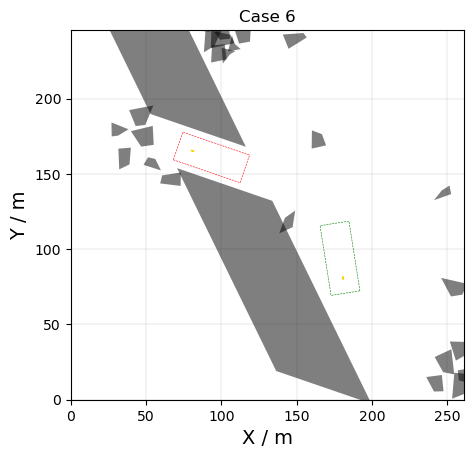

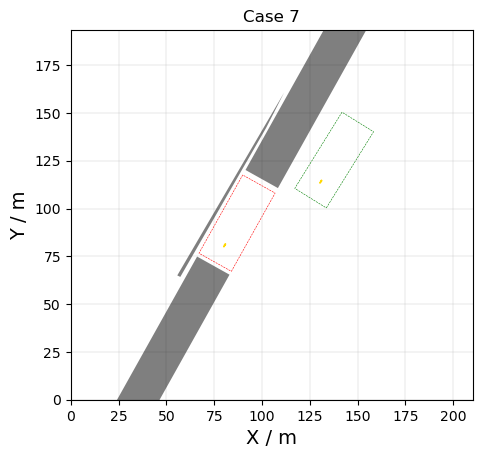

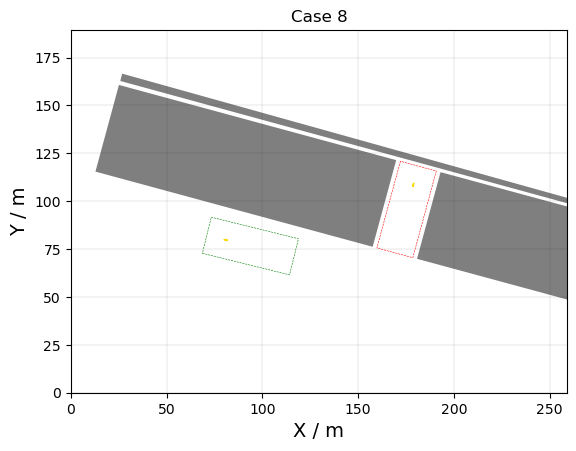

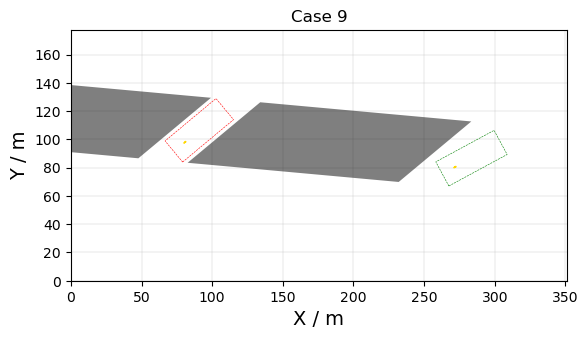

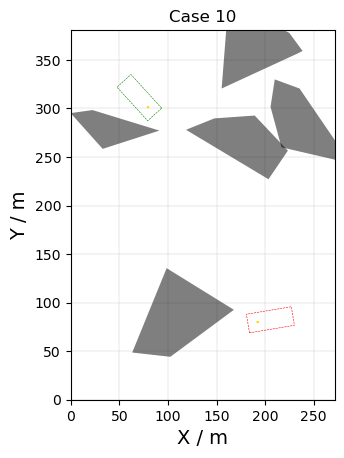

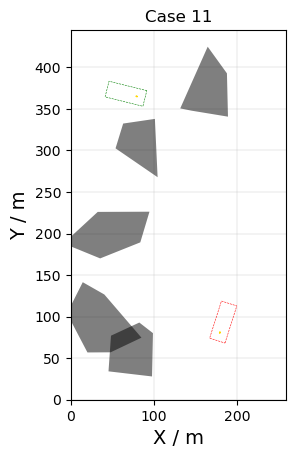

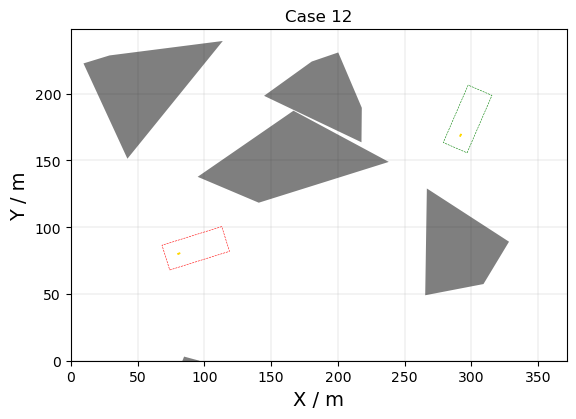

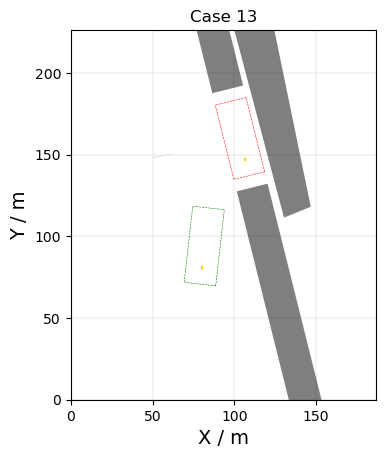

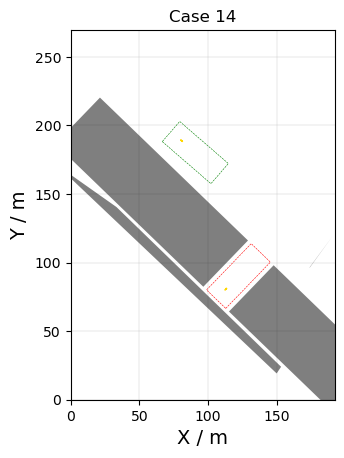

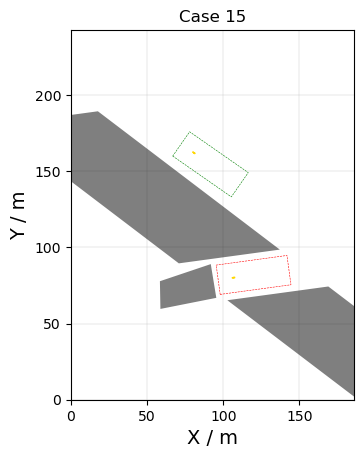

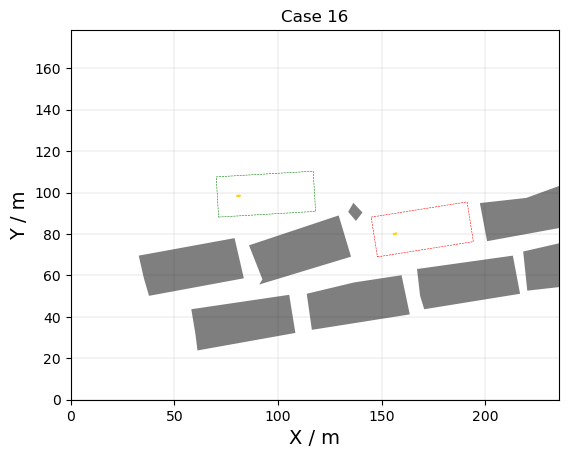

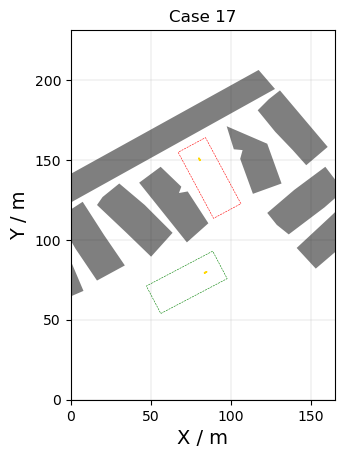

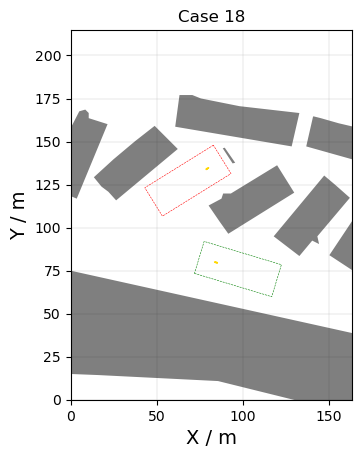

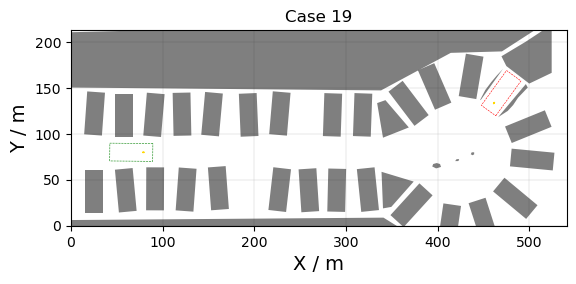

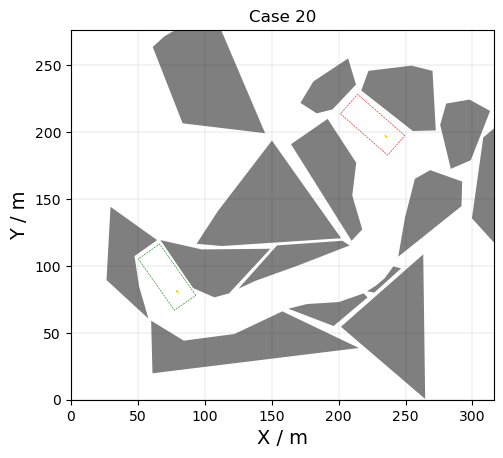

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import csv


class Vehicle:
    def __init__(self):
        self.lw = 2.8*10  # wheelbase
        self.lf = 0.96*10  # front hang length
        self.lr = 0.929*10  # rear hang length
        self.lb = 1.942*10  # width

    def create_polygon(self, x, y, theta):
        cos_theta = np.cos(theta)
        sin_theta = np.sin(theta)

        points = np.array([
            [-self.lr, -self.lb / 2, 1],
            [self.lf + self.lw, -self.lb / 2, 1],
            [self.lf + self.lw, self.lb / 2, 1],
            [-self.lr, self.lb / 2, 1],
            [-self.lr, -self.lb / 2, 1],
        ]).dot(np.array([
            [cos_theta, -sin_theta, x],
            [sin_theta, cos_theta, y],
            [0, 0, 1]
        ]).transpose())
        return points[:, 0:2]


class Case:
    def __init__(self):
        self.x_s, self.y_s, self.theta_s = 0, 0, 0
        self.x_g, self.y_g, self.theta_g = 0, 0, 0
        self.xmin, self.xmax = 0, 0
        self.ymin, self.ymax = 0, 0
        self.obs_num = 0
        self.obs = np.array([])
        self.vehicle = Vehicle()

    @staticmethod
    def read(file):
        case = Case()
        multiple=10
        with open(file, 'r') as f:
            reader = csv.reader(f)
            tmp = list(reader)
            v = [float(i)*multiple for i in tmp[0]]
            case.x_s, case.y_s, case.theta_s = v[0:3]
            case.x_g, case.y_g, case.theta_g = v[3:6]
            case.theta_s = case.theta_s/multiple
            case.theta_g = case.theta_g/multiple
            case.xmin = min(case.x_s, case.x_g) - 8*multiple
            case.xmax = max(case.x_s, case.x_g) + 8*multiple
            case.ymin = min(case.y_s, case.y_g) - 8*multiple
            case.ymax = max(case.y_s, case.y_g) + 8*multiple
            case.x_s-=case.xmin
            case.y_s-=case.ymin
            case.x_g-=case.xmin
            case.y_g-=case.ymin
            case.obs_num = int(v[6]/multiple)
            num_vertexes = np.array(v[7:7 + case.obs_num], dtype=np.int)
            num_vertexes = num_vertexes // multiple
            vertex_start = 7 + case.obs_num + (np.cumsum(num_vertexes, dtype=np.int) - num_vertexes) * 2
            case.obs = []
            for vs, nv in zip(vertex_start, num_vertexes):
                case.obs.append(np.array(v[vs:vs + nv * 2]).reshape((nv, 2), order='A'))
            for array in case.obs:
                array[:, 0] = array[:, 0] - case.xmin # 对 X 值乘以 2
                array[:, 1] = array[:, 1] - case.ymin  # 对 Y 值加 3
        return case



def main():
    for i in range(0, 20):
        plt.figure()
        case = Case.read('Case%d.csv' % (i + 1))
        plt.xlim(0, case.xmax-case.xmin)
        plt.ylim(0, case.ymax-case.ymin)
        plt.gca().set_aspect('equal', adjustable = 'box')
        plt.gca().set_axisbelow(True)
        plt.title('Case %d' % (i + 1))
        plt.grid(linewidth = 0.2)
        plt.xlabel('X / m', fontsize = 14)
        plt.ylabel('Y / m', fontsize = 14)

        for j in range(0, case.obs_num):
            plt.fill(case.obs[j][:, 0], case.obs[j][:, 1], facecolor = 'k', alpha = 0.5)

        plt.arrow(case.x_s, case.y_s, np.cos(case.theta_s), np.sin(case.theta_s), width=0.2, color = "gold")
        plt.arrow(case.x_g, case.y_g, np.cos(case.theta_g), np.sin(case.theta_g), width=0.2, color = "gold")
        temp = case.vehicle.create_polygon(case.x_s, case.y_s, case.theta_s)
        plt.plot(temp[:, 0], temp[:, 1], linestyle='--', linewidth = 0.4, color = 'green')
        temp = case.vehicle.create_polygon(case.x_g, case.y_g, case.theta_g)
        plt.plot(temp[:, 0], temp[:, 1], linestyle='--', linewidth = 0.4, color = 'red')
    plt.show()


if __name__ == "__main__":
    main()